# Totalistic Cellular Automata

Implementation of Wolfram's [Totalistic Cellular Automata](https://www.wolframscience.com/nks/p60--more-cellular-automata/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def ter(dec):
    if dec == 0: return '0'
    out = ''
    while dec:
        out += str(dec % 3)
        dec //= 3
    return out[::-1]

In totalistic cellular automata, the state of a cell is determined based on the *average* of the three cells above it. Unlike elementary cellular automata, where each cell holds a binary digit, in totalistic cellular automata each cell holds a ternary number.

In [4]:
def rule(m):
    a = ter(m)
    a = '0' * (7 - len(a)) + a
    return {  6/3: a[0]
            , 5/3: a[1]
            , 4/3: a[2]
            , 3/3: a[3]
            , 2/3: a[4]
            , 1/3: a[5]
            , 0/3: a[6] }

In [5]:
def windows(parent):
    return [parent[i:i+3] for i in range(len(parent)-2)]

def step(parent, rule):
    return '0'+''.join(rule[sum(int(x) for x in window)/3] 
                       for window in windows(parent))+'0'

def generate(init, rule, steps):
    out = ''
    curr = init
    for _ in range(steps):
        out = ''.join([out, curr, '\n'])
        curr = step(curr, rule)
    return out

def visualize(automaton, q=False):
    tmp = automaton.strip().split('\n')
    data = np.array([[{'2': 255, '1':127, '0':0}[y] for y in x] for x in tmp])
    if q:
        fig, ax = plt.subplots(figsize=(len(data), len(data[0])))
        ax.matshow(data, cmap='binary')
    else: plt.imshow(data, cmap='binary')
    
def tcl(root, m, x, q=False):
    visualize(generate(root, rule(m), x), q=q)

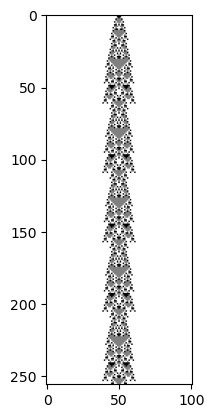

In [6]:
x = 2**8
root = '0'*50 + '1' + '0'*50
tcl(root, 1815, x)

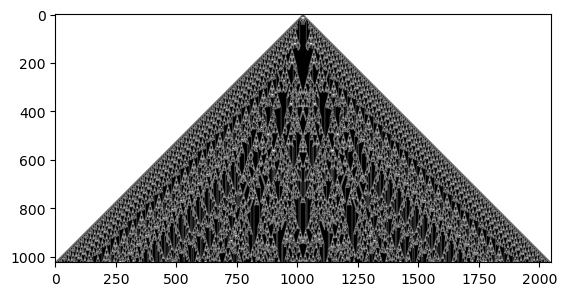

In [7]:
x = 2**10
root = '0'*x + '1' + '0'*x
tcl(root, 2049, x)

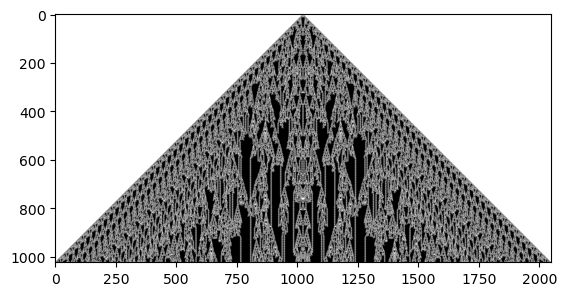

In [8]:
x = 2**10
root = '0'*x + '1' + '0'*x
tcl(root, 1635, x)

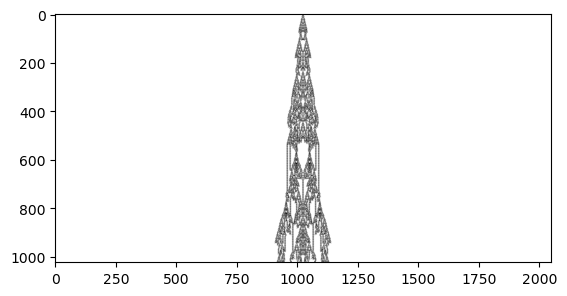

In [9]:
x = 2**10
root = '0'*x + '1' + '0'*x
tcl(root, 1599, x)